In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [130]:
data_df = pd.read_csv("bank_marketing_part1_Data.csv")

In [131]:
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [132]:
data_df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [133]:
data_df.shape

(210, 7)

In [134]:
data_df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [135]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [136]:
data_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [137]:
data_df.describe(percentiles=[0.25,0.50,0.75]).T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'spending'}, xlabel='spending'>

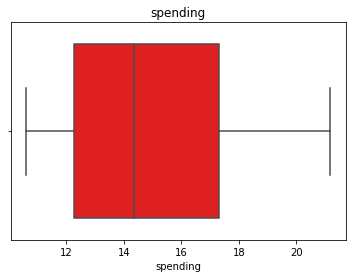

In [138]:
plt.title('spending')
sns.boxplot(data_df['spending'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


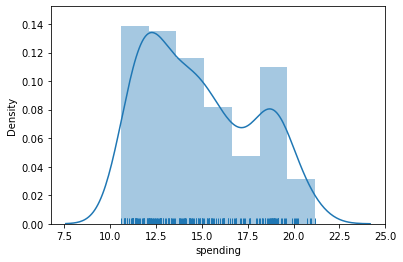

In [139]:
sns.distplot(data_df['spending'], kde=True, rug=True);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'advance_payments\t'}, xlabel='advance_payments'>

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


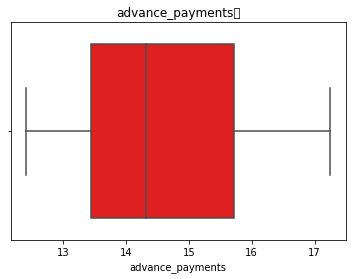

In [140]:
plt.title('advance_payments	')
sns.boxplot(data_df['advance_payments'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


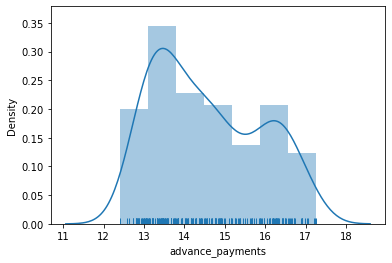

In [141]:
sns.distplot(data_df['advance_payments'], kde=True, rug=True);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'probability_of_full_payment'}, xlabel='probability_of_full_payment'>

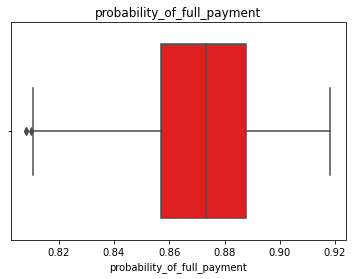

In [142]:
plt.title('probability_of_full_payment')
sns.boxplot(data_df['probability_of_full_payment'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


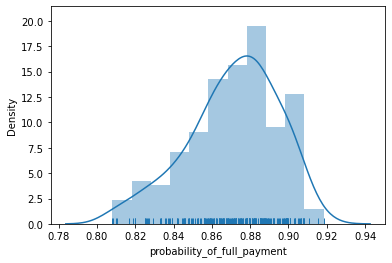

In [143]:
sns.distplot(data_df['probability_of_full_payment'], kde=True, rug=True);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'current_balance'}, xlabel='current_balance'>

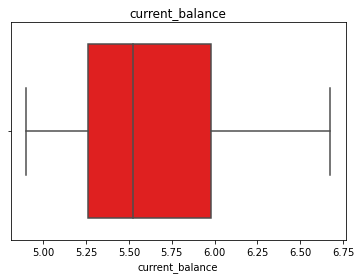

In [144]:
plt.title('current_balance')
sns.boxplot(data_df['current_balance'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


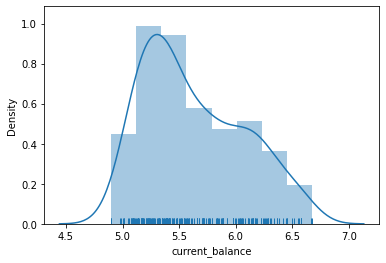

In [145]:
sns.distplot(data_df['current_balance'], kde=True, rug=True);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'credit_limit'}, xlabel='credit_limit'>

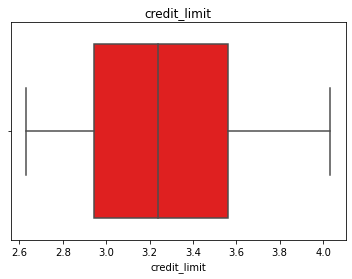

In [146]:
plt.title('credit_limit')
sns.boxplot(data_df['credit_limit'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


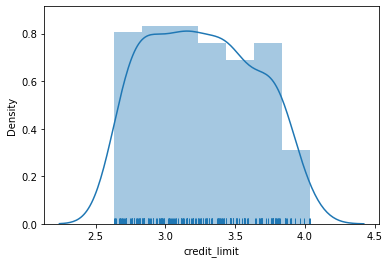

In [147]:
sns.distplot(data_df['credit_limit'], kde=True, rug=True);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'min_payment_amt'}, xlabel='min_payment_amt'>

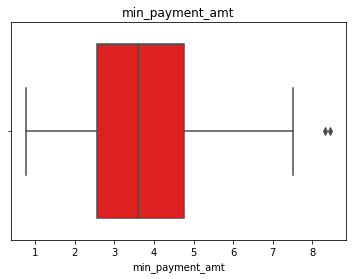

In [148]:
plt.title('min_payment_amt')
sns.boxplot(data_df['min_payment_amt'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


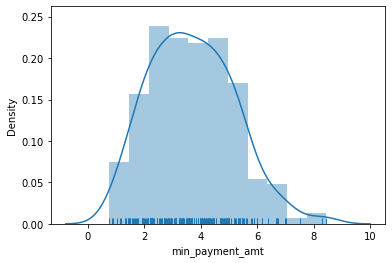

In [149]:
sns.distplot(data_df['min_payment_amt'], kde=True, rug=True);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'max_spent_in_single_shopping'}, xlabel='max_spent_in_single_shopping'>

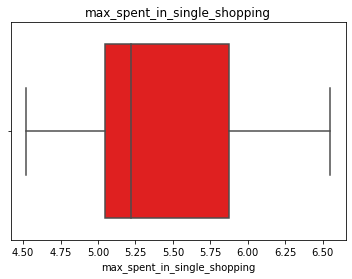

In [150]:
plt.title('max_spent_in_single_shopping')
sns.boxplot(data_df['max_spent_in_single_shopping'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


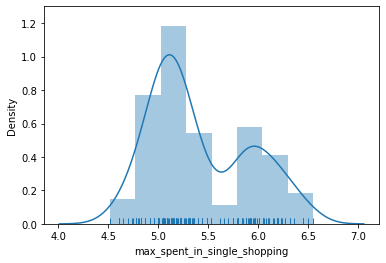

In [151]:
sns.distplot(data_df['max_spent_in_single_shopping'], kde=True, rug=True);

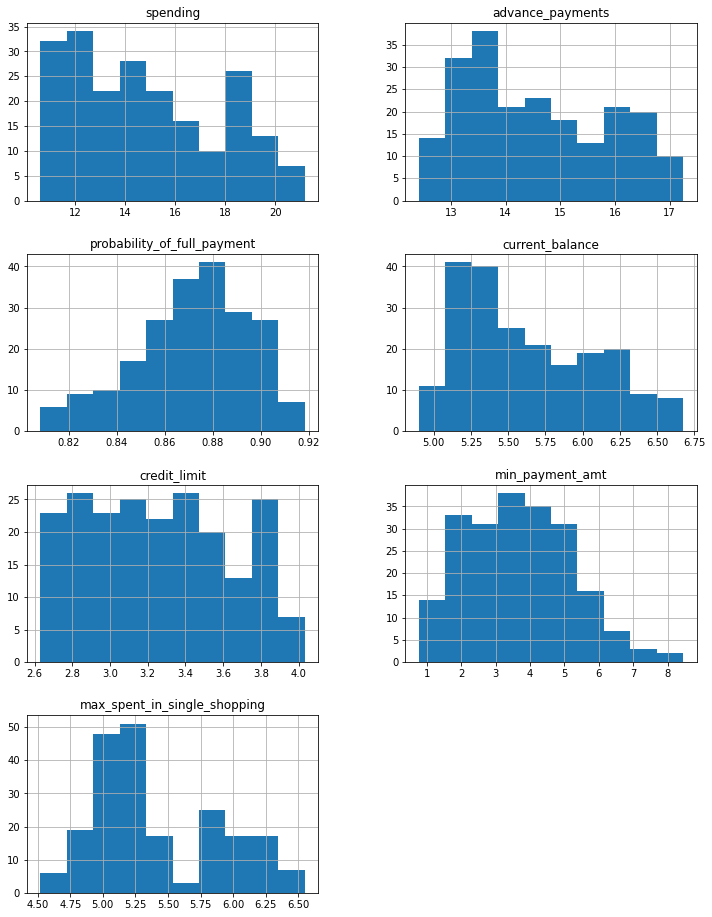

In [152]:
data_df.hist(figsize=(12,16),layout=(4,2));

In [153]:
data_df.describe(percentiles=[0.25,0.50,0.75]).T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


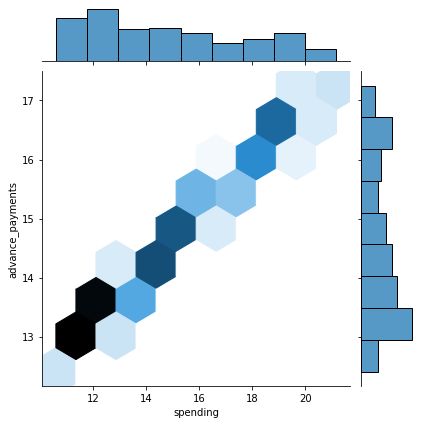

In [154]:
sns.jointplot(data_df['spending'], data_df['advance_payments'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


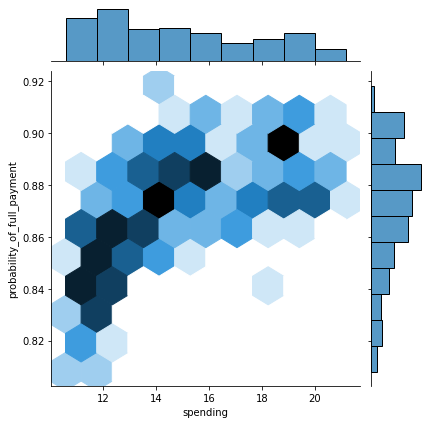

In [155]:
sns.jointplot(data_df['spending'], data_df['probability_of_full_payment'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


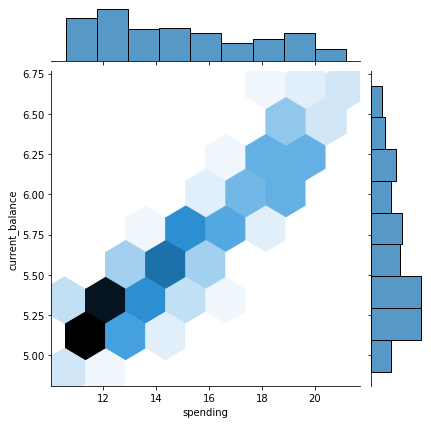

In [156]:
sns.jointplot(data_df['spending'], data_df['current_balance'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


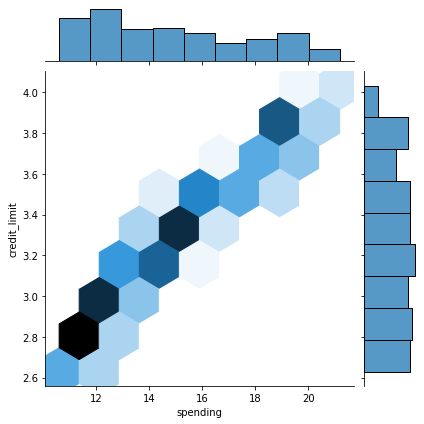

In [157]:
sns.jointplot(data_df['spending'], data_df['credit_limit'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


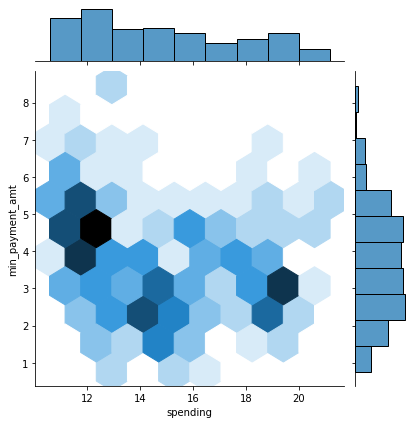

In [158]:
sns.jointplot(data_df['spending'], data_df['min_payment_amt'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


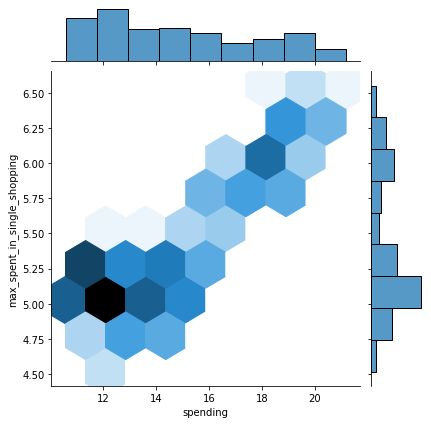

In [159]:
sns.jointplot(data_df['spending'], data_df['max_spent_in_single_shopping'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


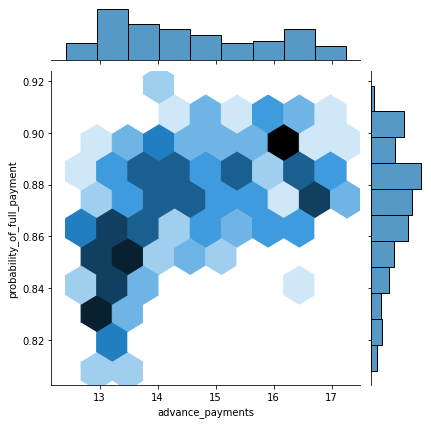

In [160]:
sns.jointplot(data_df['advance_payments'], data_df['probability_of_full_payment'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


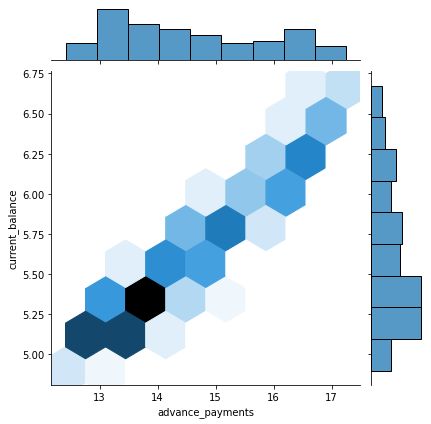

In [161]:
sns.jointplot(data_df['advance_payments'], data_df['current_balance'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


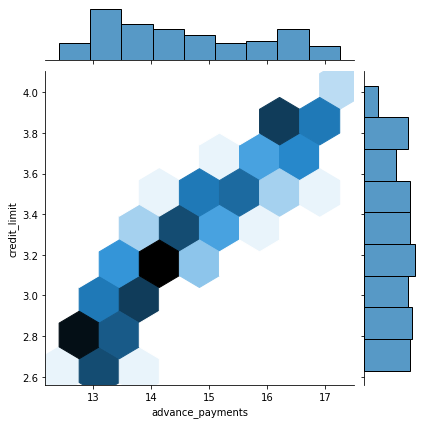

In [162]:
sns.jointplot(data_df['advance_payments'], data_df['credit_limit'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


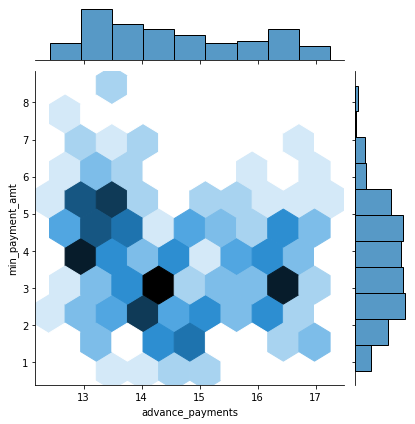

In [163]:
sns.jointplot(data_df['advance_payments'], data_df['min_payment_amt'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


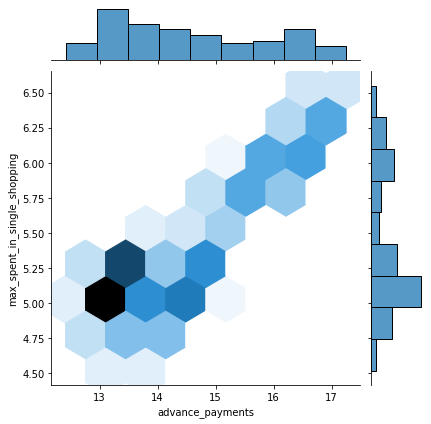

In [164]:
sns.jointplot(data_df['advance_payments'], data_df['max_spent_in_single_shopping'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


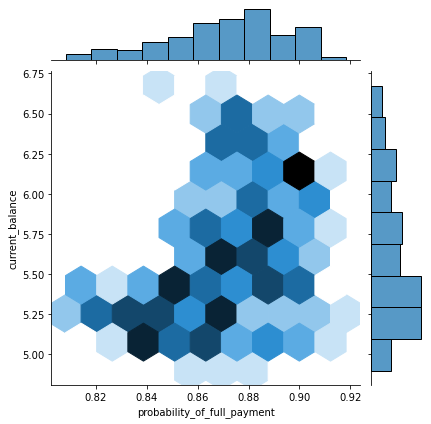

In [165]:
sns.jointplot(data_df['probability_of_full_payment'], data_df['current_balance'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


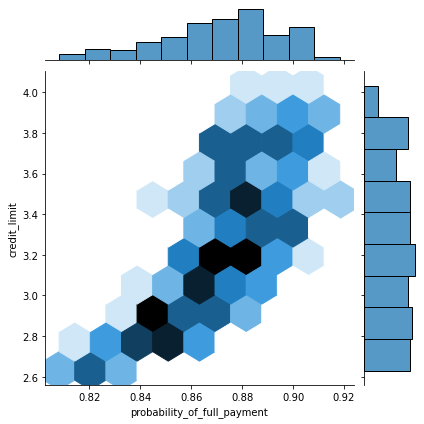

In [166]:
sns.jointplot(data_df['probability_of_full_payment'], data_df['credit_limit'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


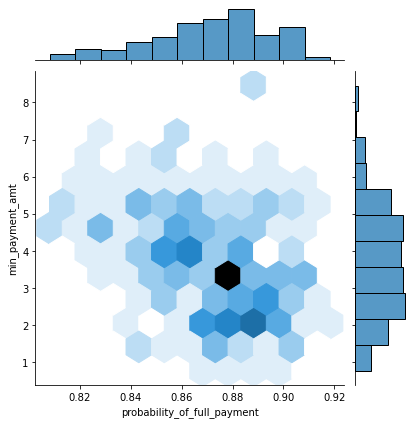

In [167]:
sns.jointplot(data_df['probability_of_full_payment'], data_df['min_payment_amt'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


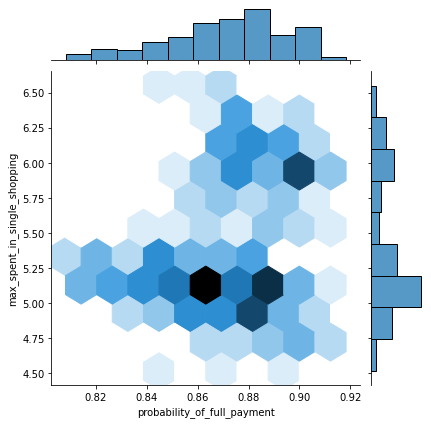

In [168]:
sns.jointplot(data_df['probability_of_full_payment'], data_df['max_spent_in_single_shopping'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


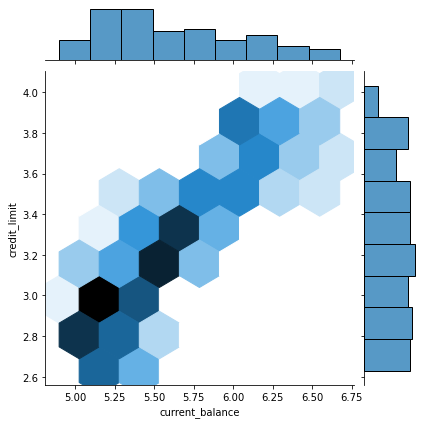

In [169]:
sns.jointplot(data_df['current_balance'], data_df['credit_limit'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


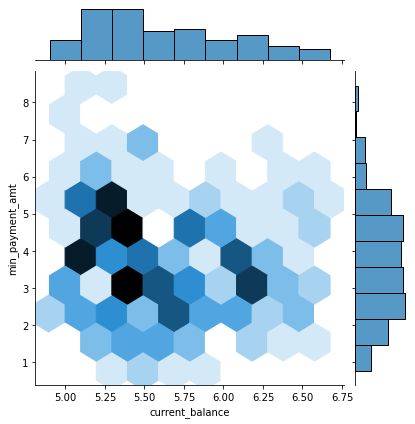

In [170]:
sns.jointplot(data_df['current_balance'], data_df['min_payment_amt'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


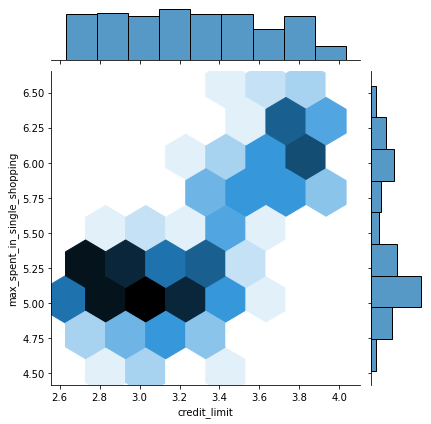

In [171]:
sns.jointplot(data_df['credit_limit'], data_df['max_spent_in_single_shopping'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


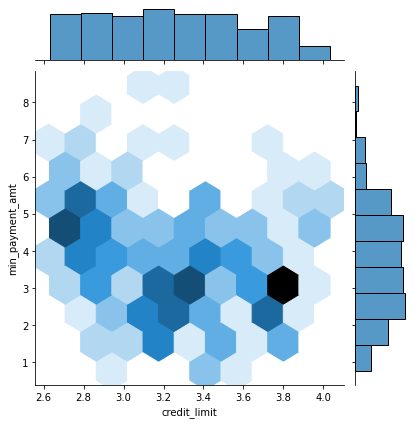

In [172]:
sns.jointplot(data_df['credit_limit'], data_df['min_payment_amt'],kind="hex");

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


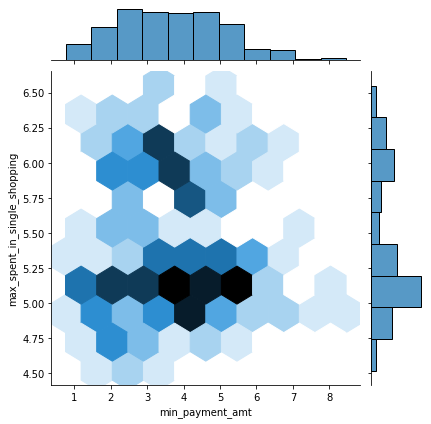

In [173]:
sns.jointplot(data_df['min_payment_amt'], data_df['max_spent_in_single_shopping'],kind="hex");

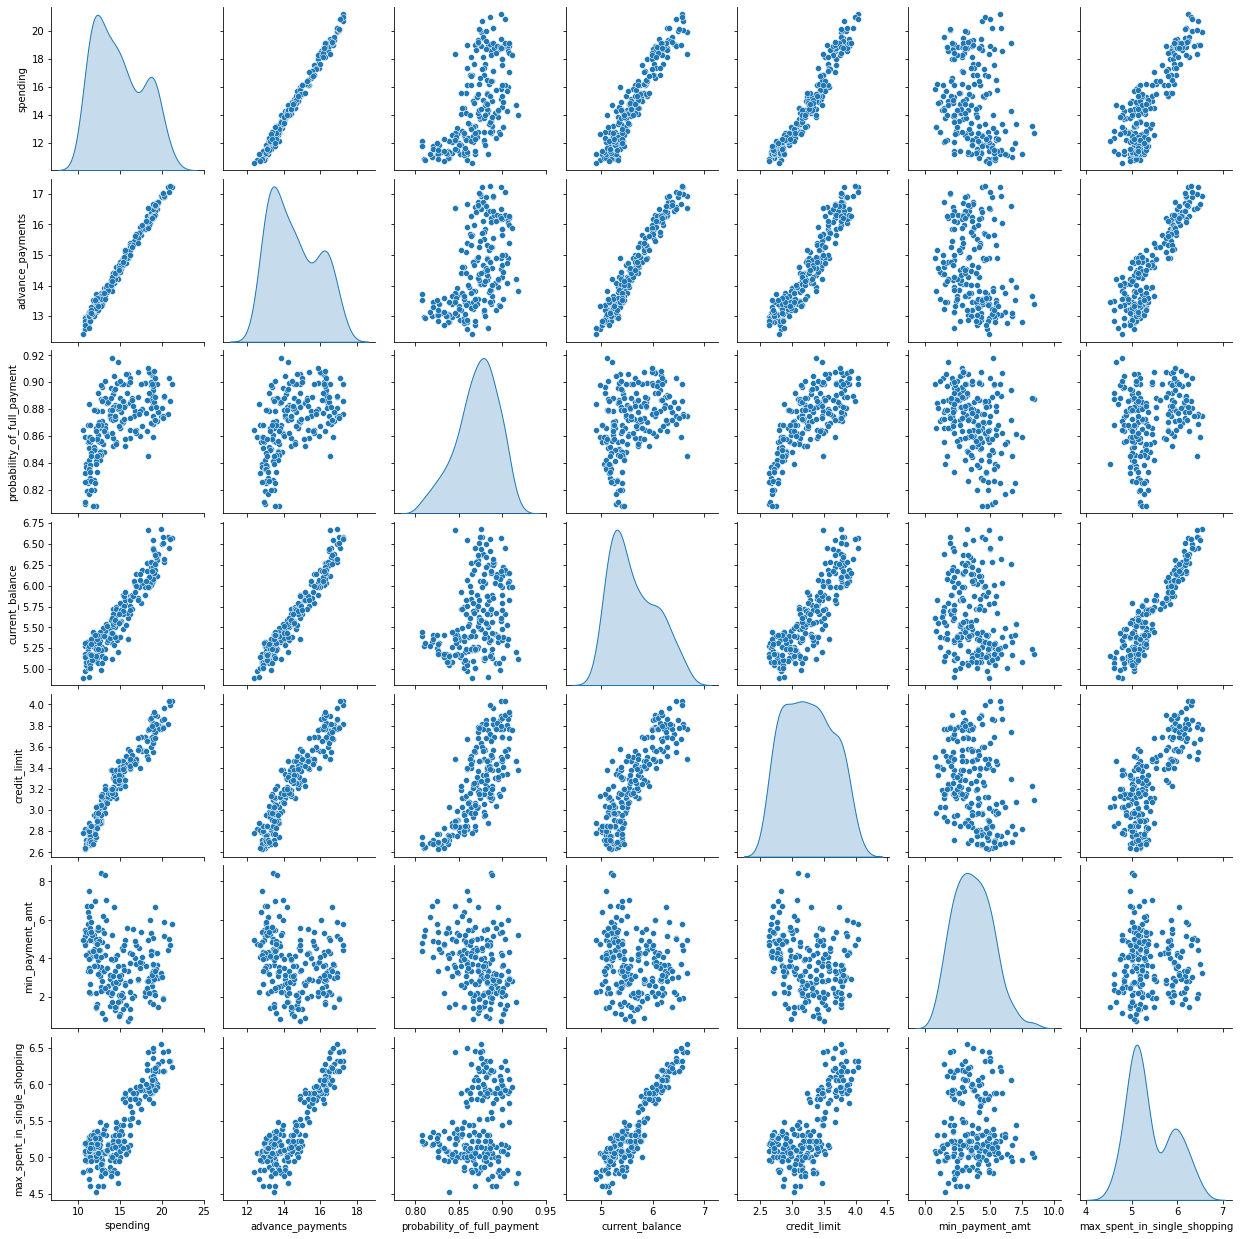

In [174]:
sns.pairplot(data_df,diag_kind='kde')

In [175]:
data_df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


<AxesSubplot:>

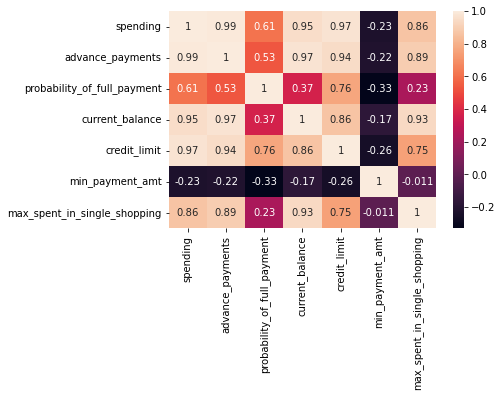

In [176]:
sns.heatmap(data_df.corr(),annot=True)

In [177]:
df=data_df.copy()

In [178]:
Q1 = np.percentile(df['probability_of_full_payment'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['probability_of_full_payment'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


In [179]:
# Upper bound
upper = np.where(df['probability_of_full_payment'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['probability_of_full_payment'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)


New Shape:  (206, 7)


/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'probability_of_full_payment'}, xlabel='probability_of_full_payment'>

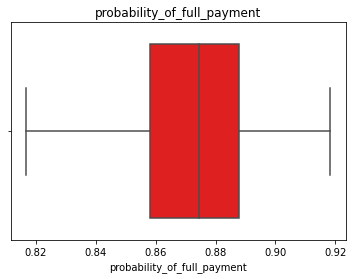

In [180]:
plt.title('probability_of_full_payment')
sns.boxplot(df['probability_of_full_payment'],orient='horizondal',color='red')

In [181]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [182]:
lrmin_payment_amt,urmin_payment_amt=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>urmin_payment_amt,urmin_payment_amt,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lrmin_payment_amt,lrmin_payment_amt,df['min_payment_amt'])



/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'min_payment_amt'}, xlabel='min_payment_amt'>

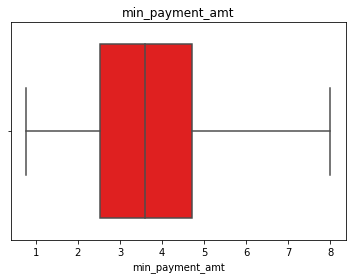

In [183]:
plt.title('min_payment_amt')
sns.boxplot(df['min_payment_amt'],orient='horizondal',color='red')

<AxesSubplot:>

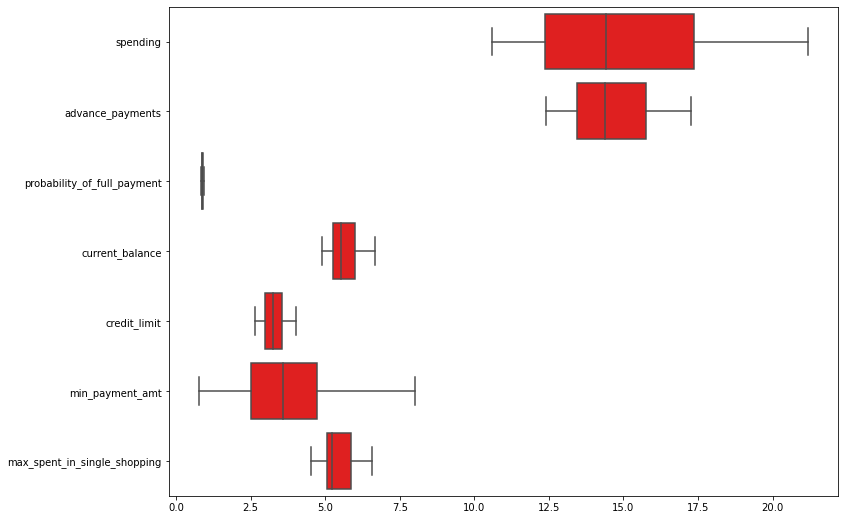

In [184]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df,orient='horizondal',color='red')


In [185]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.739573,1.793788,0.135487,2.342115,1.327244,-0.281538,2.302885
1,0.372161,0.234955,1.543636,-0.609096,0.840080,-0.225222,-0.541288
2,1.396854,1.409839,0.483011,1.381622,1.305712,-0.203768,1.489686
4,1.064521,0.979816,1.218678,0.576337,1.141530,-1.075325,0.860570
5,-0.766773,-0.901535,0.686109,-1.013987,-0.481455,2.899978,-0.832583


In [186]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [187]:
wardlink = linkage(df_scaled, method = 'ward')

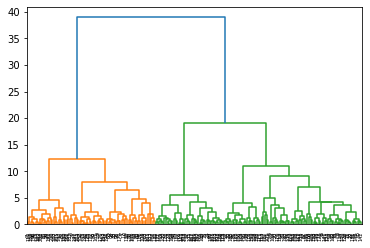

In [188]:
dend = dendrogram(wardlink)

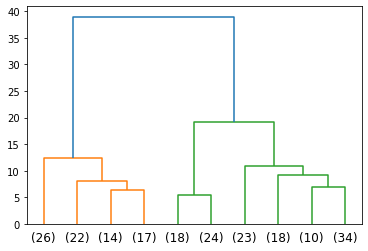

In [189]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [190]:
from scipy.cluster.hierarchy import fcluster

In [191]:
clusters_ward = fcluster(wardlink, 3, criterion='maxclust')
clusters_ward

array([1, 2, 1, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1,
       3, 2, 1, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1, 3,
       2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 1, 2, 1, 1, 2,
       1, 3, 2, 3, 1, 1, 3, 1, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3,
       1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1, 1, 2, 1,
       3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2, 3, 1, 3,
       1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 3,
       3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 2, 1, 1, 1, 2, 3, 1,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1, 3, 1, 3, 2, 1,
       2, 3, 1, 3, 1, 2, 1, 1], dtype=int32)

In [192]:
cluster_df_ward=df.copy()

In [193]:
cluster_df_ward['clusters_ward']=clusters_ward

In [194]:
cluster_df_ward.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_ward
0,19.94,16.92,0.8752,6.675,3.763,3.2520,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.3360,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.3680,6.148,1
4,17.99,15.86,0.8992,5.890,3.694,2.0680,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,7.9975,5.000,3


In [195]:
cluster_df_ward['clusters_ward'].value_counts().sort_index()

1    79
2    42
3    85
Name: clusters_ward, dtype: int64

In [196]:
k_means = KMeans(n_clusters = 2)

In [197]:
k_means.fit(df_scaled)
k_means.labels_
k_means.inertia_

648.8555950862195

In [198]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
k_means.inertia_


428.015709826605

In [199]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
k_means.inertia_


369.7647271299267

In [200]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_scaled)
k_means.inertia_


327.8797333549371

In [201]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_scaled)
k_means.inertia_


292.4267267023376

In [202]:
wss =[] 

In [205]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [206]:
wss

[1442.0000000000002,
 648.8555950862195,
 428.015709826605,
 370.0265926549531,
 327.2191202473218,
 290.36877313423236,
 266.97573317650796,
 242.9364839547419,
 225.3902102562387,
 210.52624685372882]

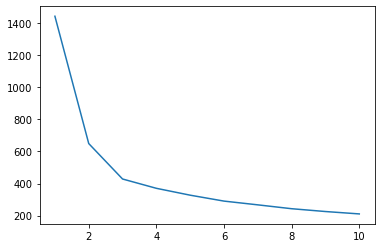

In [207]:
plt.plot(range(1,11), wss)

In [208]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
labels = k_means.labels_

In [209]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.2520,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.3360,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.3680,6.148,1
4,17.99,15.86,0.8992,5.890,3.694,2.0680,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,7.9975,5.000,0


In [211]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [212]:
silhouette_score(df_scaled,labels)

0.3969090219675306

In [215]:
sil_width = silhouette_samples(df_scaled,labels)

In [216]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.2520,6.550,1,0.568594
1,15.99,14.89,0.9064,5.363,3.582,3.3360,5.144,2,0.362325
2,18.95,16.42,0.8829,6.248,3.755,3.3680,6.148,1,0.630177
4,17.99,15.86,0.8992,5.890,3.694,2.0680,5.837,1,0.351125
5,12.70,13.41,0.8874,5.183,3.091,7.9975,5.000,0,0.220702


In [218]:
silhouette_samples(df_scaled,labels).min()

0.015354095057712808

In [219]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
labels = k_means.labels_

In [220]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.2520,6.550,3,0.568594
1,15.99,14.89,0.9064,5.363,3.582,3.3360,5.144,2,0.362325
2,18.95,16.42,0.8829,6.248,3.755,3.3680,6.148,3,0.630177
4,17.99,15.86,0.8992,5.890,3.694,2.0680,5.837,3,0.351125
5,12.70,13.41,0.8874,5.183,3.091,7.9975,5.000,0,0.220702


In [221]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [222]:
silhouette_score(df_scaled,labels)

0.3249567858309758

In [223]:
sil_width = silhouette_samples(df_scaled,labels)

In [224]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.2520,6.550,3,0.427835
1,15.99,14.89,0.9064,5.363,3.582,3.3360,5.144,2,0.095506
2,18.95,16.42,0.8829,6.248,3.755,3.3680,6.148,3,0.419811
4,17.99,15.86,0.8992,5.890,3.694,2.0680,5.837,3,0.093016
5,12.70,13.41,0.8874,5.183,3.091,7.9975,5.000,0,0.226008


In [225]:
silhouette_samples(df_scaled,labels).min()

-0.04765808994100932